In [99]:
import pandas as pd

In [100]:
supporting_df =  pd.read_csv('supporting.csv')
supporting_df.time_spent_on_app = supporting_df.time_spent_on_app.round(2)

In [101]:
df_promotions = pd.read_csv('data/promotions.csv')

In [102]:
df_promotions = df_promotions.merge(supporting_df[['WEEK_NO','HOUSEHOLD_KEY','time_spent_on_app']], on=['WEEK_NO','HOUSEHOLD_KEY'], how='left')



In [105]:
df_promotions['time_spent_on_app'] = df_promotions.sort_values('WEEK_NO').groupby('HOUSEHOLD_KEY')['time_spent_on_app'].shift(-1)

df_promotions.head()


,WEEK_NO,HOUSEHOLD_KEY,TIME_IN_APP,NUM_COUPONS,time_spent_on_app
0,1,1,11,0,NaN
801,2,1,11,0,NaN
1602,3,1,11,0,NaN
2403,4,1,11,0,NaN
3204,5,1,11,0,NaN
4005,6,1,11,0,NaN
4806,7,1,11,0,NaN
5607,8,1,65,0,63.70
6408,9,1,11,0,64.94
7209,10,1,72,0,72.17


In [106]:
df_promotions.sort_values('HOUSEHOLD_KEY').head()

,WEEK_NO,HOUSEHOLD_KEY,TIME_IN_APP,NUM_COUPONS,time_spent_on_app
0,1,1,11,0,NaN
59274,75,1,11,0,71.62
58473,74,1,74,0,72.41
57672,73,1,73,0,73.16
56871,72,1,79,0,78.85


In [107]:
df_promotions = df_promotions.drop('TIME_IN_APP', axis=1)

In [108]:
df_promotions.head()

,WEEK_NO,HOUSEHOLD_KEY,NUM_COUPONS,time_spent_on_app
0,1,1,0,NaN
801,2,1,0,NaN
1602,3,1,0,NaN
2403,4,1,0,NaN
3204,5,1,0,NaN


In [109]:
df_promotions = df_promotions.rename(columns={'time_spent_on_app': 'TIME_IN_APP'})

In [92]:
supporting_df.head()

,HOUSEHOLD_KEY,WEEK_NO,time_spent_on_app,supporting
0,1,1,NaN,NaN
1,1,2,NaN,NaN
2,1,3,NaN,NaN
3,1,4,NaN,NaN
4,1,5,NaN,NaN


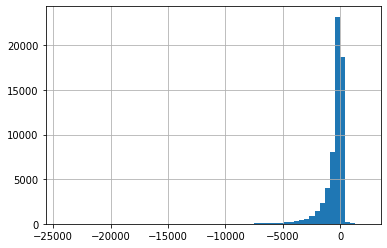

In [93]:
import matplotlib.pyplot as plt

supporting_df.supporting.hist(bins=60)

In [112]:
df_promotions = df_promotions.merge(supporting_df[['WEEK_NO','HOUSEHOLD_KEY','supporting']], on=['WEEK_NO','HOUSEHOLD_KEY'], how='left')


In [115]:
df_promotions.head()

,WEEK_NO,HOUSEHOLD_KEY,NUM_COUPONS,TIME_IN_APP,WEEKLY_BONUS_POINTS
0,1,1,0,NaN,NaN
1,2,1,0,NaN,NaN
2,3,1,0,NaN,NaN
3,4,1,0,NaN,NaN
4,5,1,0,NaN,NaN


In [114]:
df_promotions = df_promotions.rename(columns={'supporting': 'WEEKLY_BONUS_POINTS'})

In [ ]:
df_promotions.to_csv('data_new/promotions.csv', index=False)